In [1]:
# Libs initialization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

from scipy.optimize import curve_fit, minimize

In [4]:
path_to_file = r'C:\Users\sorok\Desktop\MTR\bank.csv'
source_df = pd.read_csv(path_to_file)

In [5]:
source_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


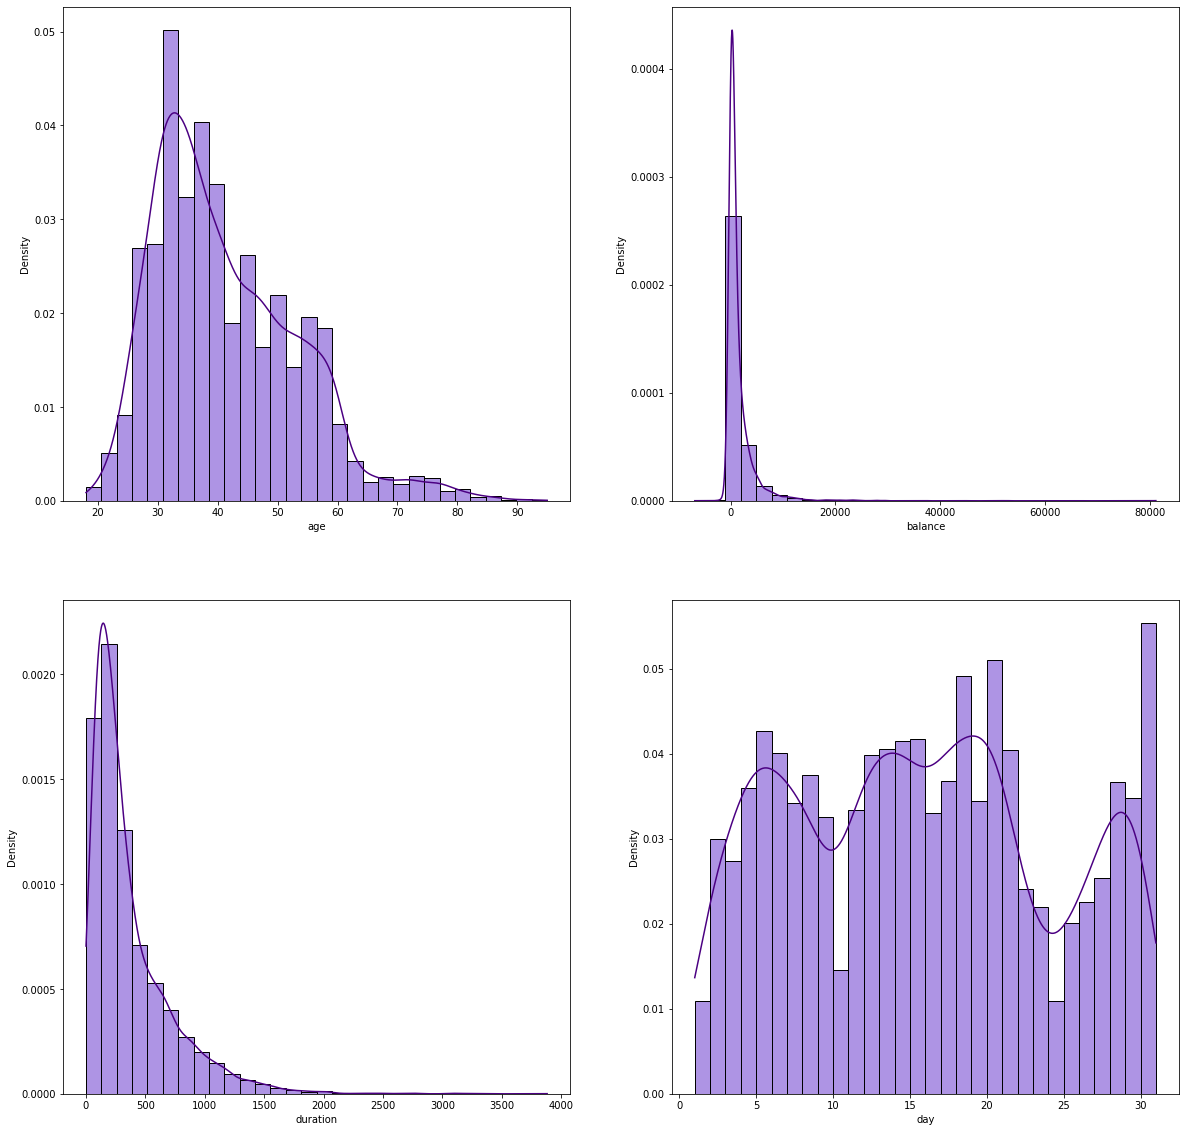

In [8]:
# Data kernels to visualize distributions of different features
col_names = [
        'age',
        'balance', 
        'duration', 
        'day']

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0
for i in range(2):
    for j in range(2):
        col_name = col_names[col_idx]

        kernel = sp.stats.gaussian_kde(source_df[col_name])
        min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
        x = np.linspace(min_amount, max_amount, len(source_df[col_name]))
        kde_values = kernel(x)
        sns.histplot(source_df[col_name], kde=False, bins=30, stat='density', ax=axes[i, j], palette='Set3', color = 'mediumpurple')
        axes[i, j].plot(x, kde_values, c = 'indigo')
        
        col_idx += 1

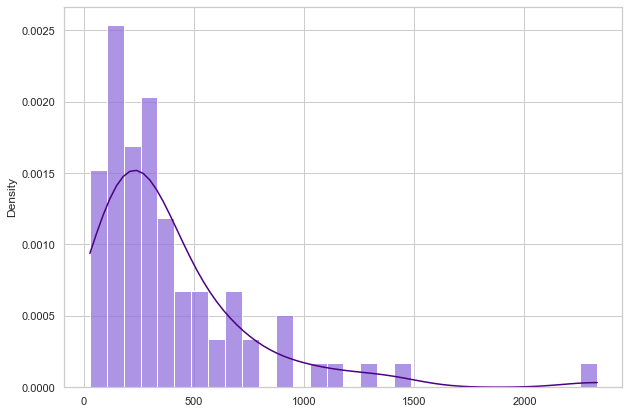

In [79]:
# We choose duration as it seems good for a logmoramal sampling
# My birthday day is 12, thus I choose a sample of 77 data rows
plt.figure(figsize=(10,7))
df = source_df.duration.sample(n = 65+12, random_state = 4).to_numpy()
kernel = sp.stats.gaussian_kde(df)
min_amount, max_amount = df.min(), df.max()
x = np.linspace(min_amount, max_amount, len(df))
kde_values = kernel(x)
sns.histplot(df, kde=False, bins=30, stat='density', palette='Set3', color = 'mediumpurple')
plt.plot(x, kde_values, c = 'indigo')

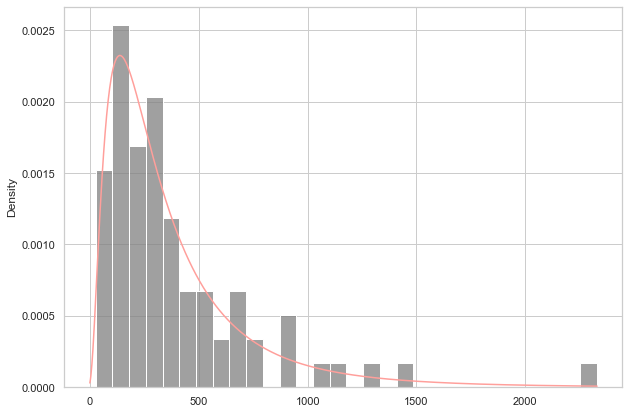

In [81]:
# Get the lognormal distribution for our data
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid', palette='pastel')
sns.histplot(df, kde=False, bins=30, stat='density', palette='Set3', color = 'grey')
max_amount = df.max()
x = np.linspace(0, max_amount, 1000)
mle_params = sp.stats.lognorm.fit(df, loc=1.1, scale=1.1)
pdf_mle = sp.stats.lognorm.pdf(x, *mle_params)
plt.plot(x, pdf_mle, color='r')

<AxesSubplot:ylabel='Density'>

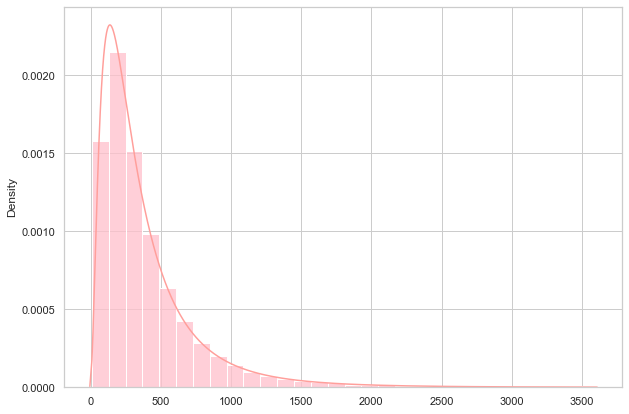

In [82]:
# Inverse transform data sampling for our distribution
plt.figure(figsize=(10,7))
params_1 = sp.stats.lognorm.fit(df, loc=1.1, scale=1.1)
x = np.linspace(0.001, 100, 1000)
ppf_1 = sp.stats.lognorm.ppf(x / 100.0, *params_1)
pdf_1 = sp.stats.lognorm.pdf(ppf_1, *params_1)
plt.plot(ppf_1, pdf_1 , 'r')
synthetic_data=ppf_1[1:ppf_1.size-1]
sns.histplot(synthetic_data, kde=False, bins=30, stat='density', palette='Set3', color = 'pink')

In [105]:
# Choose a sample of 77 data objects for the sampled data as well
np.random.seed(12313)
df_synthetic = np.random.choice(synthetic_data, size = 65+12)
df_synthetic

array([ 461.29940994,  138.85875578, 1995.80888532,  752.70052347,
        355.46313298, 1473.5272453 ,  365.02949726,   95.14647937,
        334.35695349,  675.47276912,  254.52866172,   48.37085922,
       2522.7179561 ,  150.51029329, 1113.64785957,  386.10356218,
        239.99835445,  167.09442851,   35.46080168,  527.45469153,
        121.13960139,  143.59931229,  275.02693794,  877.69660126,
        294.51583402,  276.20775463,  265.1743051 ,   33.1214941 ,
        148.77996425,  301.53031948,  189.57218997,  251.78707852,
       1241.35041661,  219.58593036,  217.11663072,  700.87484759,
        453.33887061,  480.40836841,   60.92003432,  261.77238696,
        454.46206738,  150.94320698,  114.13679834,  834.478925  ,
        698.23675603, 1055.30335027,  514.57943682,  108.37451348,
        203.10851249,  298.32058631,  314.06924897,  103.88155416,
         49.9187503 ,   97.47502262,   96.08077595,  298.95965391,
       1572.77362755,  297.0467169 ,  181.37024033,  138.42796

In [106]:
# Sorting our data
df_synthetic.sort()
df.sort()
print(df_synthetic.size)
print(df.size)

77
77


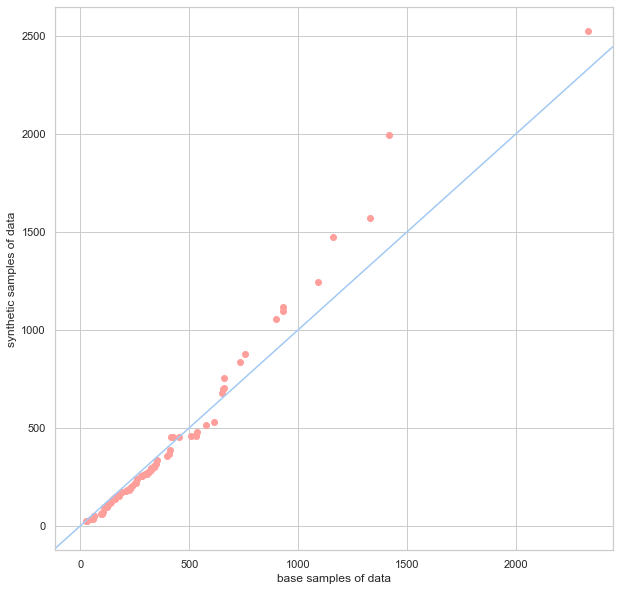

In [111]:
# 
plt.figure(figsize=(10,10))
plt.axline((1, 1), slope=1)
plt.xlabel('base samples of data')
plt.ylabel('synthetic samples of data')
plt.scatter(df, df_synthetic, color = 'r')